<>:7: SyntaxWarning: invalid escape sequence '\G'
<>:8: SyntaxWarning: invalid escape sequence '\G'
<>:7: SyntaxWarning: invalid escape sequence '\G'
<>:8: SyntaxWarning: invalid escape sequence '\G'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12460\3940779148.py:7: SyntaxWarning: invalid escape sequence '\G'
  fieldwork_data = pd.read_csv("C:\GIS\Field Work Project\Fieldwork Data\Group_11_Data_01.csv")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12460\3940779148.py:8: SyntaxWarning: invalid escape sequence '\G'
  Well_Water_Data = pd.read_csv('C:\GIS\Field Work Project\well_water_dem_extract.csv')


   Latitude  Longitude   Elevation  Accuracy        Feature_to  \
0  7.236309   5.202564  370.547756       5.0  Well_Water_Level   
1  7.236501   5.203213  365.328518       5.0  Well_Water_Level   
2  7.236285   5.203308  365.912991       5.0  Well_Water_Level   
3  7.236130   5.203657  370.278286       5.0  Well_Water_Level   
4  7.236122   5.203990  374.000000       3.9  Well_Water_Level   

   Well Water Level  RASTERVALU  
0              8.30         392  
1              7.36         391  
2              6.33         391  
3              6.07         393  
4              5.59         392  


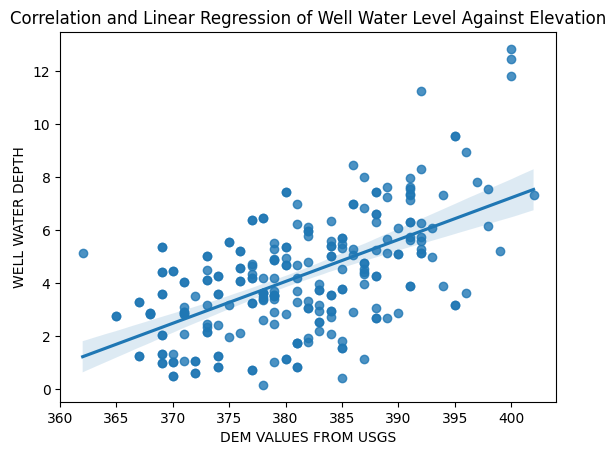

                  RASTERVALU  Well Water Level
RASTERVALU          1.000000          0.584263
Well Water Level    0.584263          1.000000


In [5]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the csv file
fieldwork_data = pd.read_csv("C:\GIS\Field Work Project\Fieldwork Data\Group_11_Data_01.csv")
Well_Water_Data = pd.read_csv('C:\GIS\Field Work Project\well_water_dem_extract.csv')

# rename columns that have Long characters and drop the 'start' and 'end' columns'
fieldwork_data = fieldwork_data.rename(columns={'latitude':'Latitude',
                                               'longitude':'Longitude',
                                               'altitude':'Elevation',
                                               'precision':'Accuracy',
                                               'Feature to be mapped':'Features',
                                               'What is the Environmental Hazard':'Environmental Hazard',
                                               'Well_Water_Level':'Well Water Level'})
Well_Water_Data = Well_Water_Data.rename(columns={'latitude':'Latitude',
                                               'longitude':'Longitude',
                                               'altitude':'Elevation',
                                               'precision':'Accuracy',
                                               'Feature to_':'Features',
                                               'Well_Water':'Well Water Level'})
fieldwork_data.drop(['start', 'end'], axis=1, inplace=True)
Well_Water_Data.drop(['start', 'end'], axis=1, inplace=True)


# Drop unnecessary solumns and create unique dataframes for each features simultaneously
Dumpsite_data = fieldwork_data.query('Features == "Illegal Dumpsites"').drop(['Environmental Hazard', 'Well Water Level'], axis=1)
Env_Hazard_Data = fieldwork_data.query('Features == "Environmental Hazards"').drop('Well Water Level', axis=1)
Telephone_Mast_Data = fieldwork_data.query('Features == "Telephone Masts"').drop(['Environmental Hazard', 'Well Water Level'], axis=1)
Transformer_Data = fieldwork_data.query('Features == "Transformer"').drop(['Environmental Hazard', 'Well Water Level'], axis=1)

print(Well_Water_Data.head())

# using seaborn to visualize the correlation and as well, plot the linear regression
sns.regplot(x='RASTERVALU', y='Well Water Level', data=Well_Water_Data, fit_reg=True)
plt.title('Correlation and Linear Regression of Well Water Level Against Elevation')
plt.xlabel('DEM VALUES FROM USGS')
plt.ylabel('WELL WATER DEPTH')
plt.show()

# Get the correlation matrix of the elevation and well water level values
print(Well_Water_Data[['RASTERVALU', 'Well Water Level']].corr())

Finding the correlation between elevation values extracted from USGS DEM and the elevation values from the data acquired from the field using the kobotoolbox data collection app.

<>:8: SyntaxWarning: invalid escape sequence '\G'
<>:8: SyntaxWarning: invalid escape sequence '\G'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_996\3363469764.py:8: SyntaxWarning: invalid escape sequence '\G'
  elevation_comparison = pd.read_csv('C:\GIS\Field Work Project\well_water_dem_extract.csv')


Index(['start', 'end', 'latitude', 'longitude', 'altitude', 'precision',
       'Feature_to', 'Well_Water', 'RASTERVALU'],
      dtype='object')
      start       end  latitude  longitude    altitude  precision  \
0  2/1/2024  2/1/2024  7.236309   5.202564  370.547756        5.0   
1  2/1/2024  2/1/2024  7.236501   5.203213  365.328518        5.0   
2  2/1/2024  2/1/2024  7.236285   5.203308  365.912991        5.0   
3  2/1/2024  2/1/2024  7.236130   5.203657  370.278286        5.0   
4  2/1/2024  2/1/2024  7.236122   5.203990  374.000000        3.9   

         Feature_to  Well_Water  RASTERVALU  
0  Well_Water_Level        8.30         392  
1  Well_Water_Level        7.36         391  
2  Well_Water_Level        6.33         391  
3  Well_Water_Level        6.07         393  
4  Well_Water_Level        5.59         392  
(246, 9)
Intercept:  -32.3156426518795
Slope:  1.0371256989027724
R-Squared:  0.5765343235355453
Adjusted R-squared:  0.5747988084680681
Mean Squared Error (MSE):  

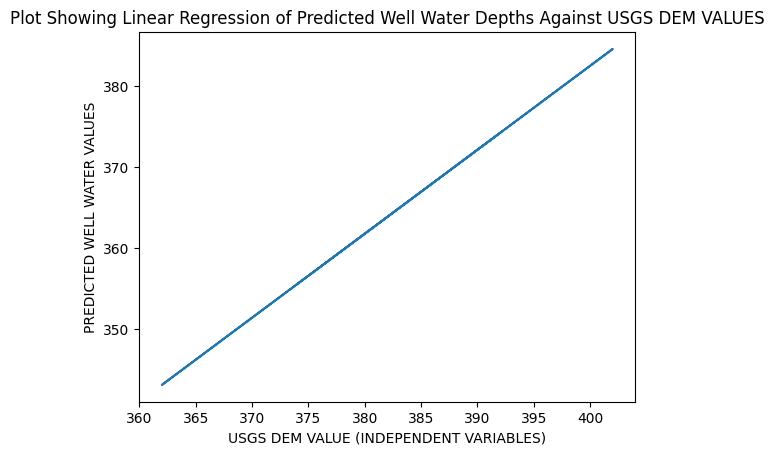

In [ ]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

elevation_comparison = pd.read_csv('C:\GIS\Field Work Project\well_water_dem_extract.csv')

print(elevation_comparison.columns)
print(elevation_comparison.head())
print(elevation_comparison.shape)
# print(elevation_comparison[['altitude', 'RASTERVALU']].corr())

'''#Scatter plot for water level against usgs dem values
sns.regplot(x='RASTERVALU', y='Well_Water', data=elevation_comparison, fit_reg=True)
plt.xlabel('DEM VALUES FROM USGS')
plt.ylabel('WELL WATER DEPTH')
plt.title('SCATTER PLOT SHOWING RELATIONSHIP BETWEEN WELL WATER DEPTH & USGS DEM VALUE')
plt.show()

print(elevation_comparison[['RASTERVALU', 'Well_Water']].corr())

#Scatter plot for field dem against usgs dem values
sns.regplot(x='RASTERVALU', y='altitude', data=elevation_comparison, fit_reg=True)
plt.xlabel('DEM VALUES FROM USGS')
plt.ylabel('DEM VALUES FROM THE FIELD')
plt.title('SCATTER PLOT COMPARING DEM VALUES FROM THE FIELD VS USGS DEM VALUES')
plt.show()

print(elevation_comparison[['RASTERVALU', 'altitude']].corr())'''


# Regression calculations for Water Level
# Reshape data for scikit-learn
x_array = elevation_comparison['RASTERVALU'].values.reshape(-1, 1)
y_array = elevation_comparison['altitude'].to_numpy()

# Create/Initiate a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_array, y_array)

# Make predictions
y_pred = model.predict(x_array)

# Calculate regression metrics
intercept = model.intercept_
slope = model.coef_[0]
r_squared = r2_score(y_array, y_pred)
adjusted_r_squared = 1 - (1 - r_squared) * ((len(y_array) - 1)) / (len(y_array) - x_array.shape[1] - 1)
mse = mean_squared_error(y_array, y_pred)
rmse = np.sqrt(mse)

# Print the results
print("Intercept: ", intercept)
print("Slope: ", slope)
print("R-Squared: ", r_squared)
print("Adjusted R-squared: ", adjusted_r_squared)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Square Error (RMSE): ", rmse)

vis_data = {'Metric':['Intercept', 'Slope', 'R-squared', 'Adjusted R-squared', 'MSE', 'RMSE'], 'Value': [intercept, slope, r_squared, adjusted_r_squared, mse, rmse]}
vis_data_1 = pd.DataFrame(vis_data)
print(vis_data_1)

# Plot the regression line
plt.plot(x_array, y_pred)
plt.xlabel('USGS DEM VALUE (INDEPENDENT VARIABLES)')
plt.ylabel('PREDICTED WELL WATER VALUES')
plt.title('Plot Showing Linear Regression of Predicted Well Water Depths Against USGS DEM VALUES')
plt.show()

